remove white space on plotly objects  
ask dr.clark about proper plotting


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set plot width here
plt.rcParams['figure.figsize'] = (15, 10)
from functions import import_data, my_plot_function

today = pd.to_datetime('today').strftime('%Y-%m-%d')

tickers = ['^VIX','^VIX3M', 'VXX']

VIX = import_data(tickers[0], '2020-01-01', today, '1d')
VIX3M = import_data(tickers[1], '2020-01-01', today, '1d')
VXX = import_data(tickers[2], '2020-01-01', today, '1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


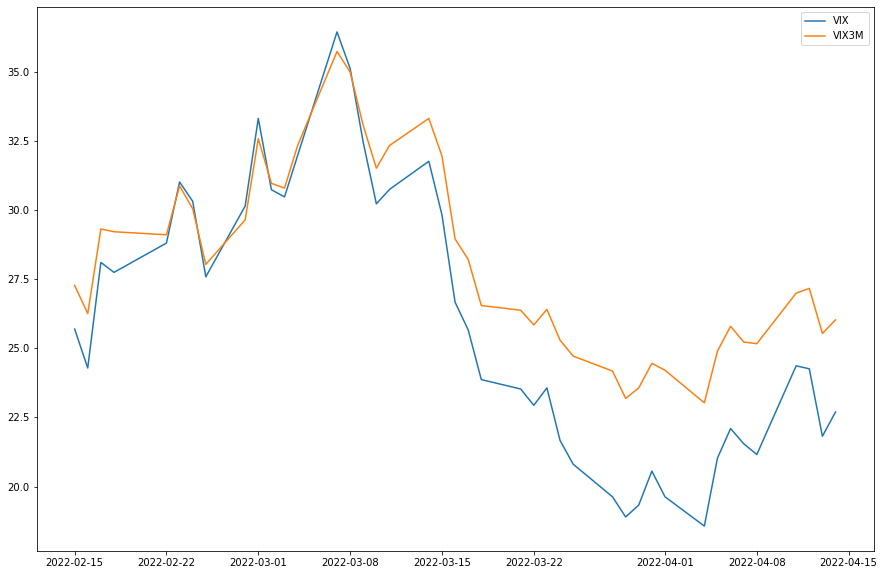

In [2]:
# plot vix and vix3m for the past month
plt.plot(VIX[-42:].index, VIX[-42:]['Close'], label='VIX')
plt.plot(VIX3M[-42:].index, VIX3M[-42:]['Close'], label='VIX3M')
plt.legend()
plt.show()



In [3]:
# repeat above cell with plotly for interactive plotting
import plotly.graph_objects as go
plot = go.Figure()
plot.add_trace(go.Line(x=VIX[-42:].index, y=VIX[-42:]['Close'], name='VIX'))
plot.add_trace(go.Line(x=VIX3M[-42:].index, y=VIX3M[-42:]['Close'], name='VIX3M'))
plot.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## The above shows that our most recent flip was correct

put in image from realtest

In [4]:
# housekeeping to combine dataframes later

df_master = pd.DataFrame(index=VIX.index)
df_master['VXX'] = VXX['Close'].round(2)
df_master['VIX'] = VIX['Close'].round(2)
df_master['VIX3M'] = VIX3M['Close'].round(2)
df_master['Contango'] = df_master['VIX'] < df_master['VIX3M']
df_master.tail(10)


,VXX,VIX,VIX3M,Contango
Date,,,,
2022-04-01,25.03,19.63,24.21,True
2022-04-04,24.43,18.57,23.03,True
2022-04-05,24.81,21.03,24.90,True
2022-04-06,24.38,22.10,25.80,True
2022-04-07,24.05,21.55,25.23,True
2022-04-08,24.67,21.16,25.17,True
2022-04-11,26.10,24.37,27.00,True
2022-04-12,25.74,24.26,27.17,True
2022-04-13,24.59,21.82,25.54,True



* NOTE:  Remove the rounding in production code.

In [5]:
df_master.tail(21)

,VXX,VIX,VIX3M,Contango
Date,,,,
2022-03-17,26.15,25.67,28.22,True
2022-03-18,25.00,23.87,26.55,True
2022-03-21,26.01,23.53,26.38,True
2022-03-22,25.44,22.94,25.85,True
2022-03-23,25.49,23.57,26.41,True
2022-03-24,25.20,21.67,25.30,True
2022-03-25,25.20,20.81,24.72,True
2022-03-28,25.73,19.63,24.18,True
2022-03-29,24.85,18.90,23.19,True


In [6]:
df = pd.read_csv('vxx2020.csv')
# housekeeping
df.drop(['symbol'], inplace=True, axis=1)
# add - to date, exdate, and last date after 4 characters
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df['exdate'] = pd.to_datetime(df['exdate'].astype(str), format='%Y%m%d')
df['last_date'] = pd.to_datetime(df['last_date'].astype(str), format='%Y%m%d')
df = df[df['volume'] != 0]
# strike price is 100x too large
df['strike_price'] = df['strike_price'] / 1000

# Thank you to Bruce for the following code snippet.
# In short: never iterate through the dataframe if you can avoid it.
# Use a built in function or vectorize if possible.

df_combined = pd.DataFrame()
df_combined = df.merge(df_master, how = 'left', left_on = 'date', right_on = 'Date')
df_combined.tail(20)

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,VXX,VIX,VIX3M,Contango
232998,2021-12-31,2022-02-11,2021-12-31,P,15.5,0.42,0.44,7,2,0.645247,-0.176845,0.063981,1.630879,-4.553390,144483209,18.53,17.22,21.88,True
232999,2021-12-31,2022-02-11,2021-12-31,P,16.0,0.62,0.65,16,12,0.684743,-0.226544,0.069952,1.892632,-5.605055,144483210,18.53,17.22,21.88,True
233000,2021-12-31,2022-02-11,2021-12-31,P,16.5,0.88,0.90,307,11,0.728892,-0.275960,0.072951,2.101703,-6.621830,144483211,18.53,17.22,21.88,True
233001,2021-12-31,2022-02-11,2021-12-31,P,17.0,1.17,1.20,322,1122,0.774095,-0.322292,0.073715,2.253605,-7.545158,144483212,18.53,17.22,21.88,True
233002,2021-12-31,2022-02-11,2021-12-31,P,17.5,1.50,1.53,3,4,0.820126,-0.364519,0.072885,2.361542,-8.372029,144483213,18.53,17.22,21.88,True
233003,2021-12-31,2022-02-11,2021-12-31,P,18.0,1.85,1.88,3,13,0.862732,-0.402396,0.071361,2.432234,-9.068841,144483214,18.53,17.22,21.88,True
233004,2021-12-31,2022-02-11,2021-12-31,P,18.5,2.23,2.26,601,1301,0.907784,-0.436123,0.069022,2.475537,-9.709855,144483215,18.53,17.22,21.88,True
233005,2021-12-31,2022-02-11,2021-12-31,P,19.0,2.62,2.65,15,0,0.948790,-0.466299,0.066668,2.498913,-10.243040,144483216,18.53,17.22,21.88,True
233006,2021-12-31,2022-02-11,2021-12-31,P,26.0,8.80,8.85,3,0,1.369920,-0.689946,0.041029,2.216030,-13.103750,144505363,18.53,17.22,21.88,True
233007,2021-12-31,2022-02-11,2021-12-31,P,28.0,10.65,10.75,38,0,1.454071,-0.722281,0.036743,2.108094,-13.208700,144505365,18.53,17.22,21.88,True


In [7]:
# How many NaN values are in the dataframe
print(len(df_combined))
df_combined.isna().sum()


233018


date                   0
exdate                 0
last_date              0
cp_flag                0
strike_price           0
best_bid               0
best_offer             0
volume                 0
open_interest          0
impl_volatility    27428
delta              27428
gamma              27428
vega               27428
theta              27428
optionid               0
VXX                    0
VIX                    0
VIX3M                  0
Contango               0
dtype: int64

Perhaps this is because of.... low volume?  Let's clean up strike so that we only have strike within 20% of VXX

In [8]:
df_combined = df_combined.where(df_combined['strike_price'] < df_combined['VXX']*1.2).dropna()
df_combined = df_combined.where(df_combined['strike_price'] > df_combined['VXX']*0.8).dropna()
print(len(df_combined))
# The 17 here is to only have the same option expiry date
df_combined.tail(17)

36218


,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,VXX,VIX,VIX3M,Contango
232977,2021-12-31,2022-02-11,2021-12-31,C,15.0,3.70,3.80,7.0,7.0,0.560722,0.886716,0.054494,1.206371,-3.009240,144483187.0,18.53,17.22,21.88,True
232978,2021-12-31,2022-02-11,2021-12-31,C,16.0,3.05,3.15,13.0,80.0,0.644801,0.783200,0.072428,1.845569,-5.230879,144483189.0,18.53,17.22,21.88,True
232979,2021-12-31,2022-02-11,2021-12-31,C,17.5,2.46,2.49,23.0,0.0,0.786065,0.636809,0.075921,2.358752,-8.103644,144483192.0,18.53,17.22,21.88,True
232980,2021-12-31,2022-02-11,2021-12-31,C,18.0,2.32,2.35,128.0,12.0,0.833704,0.597194,0.073833,2.432925,-8.857109,144483193.0,18.53,17.22,21.88,True
232981,2021-12-31,2022-02-11,2021-12-31,C,18.5,2.19,2.22,10.0,8.0,0.875149,0.561947,0.071618,2.477542,-9.460766,144483194.0,18.53,17.22,21.88,True
232982,2021-12-31,2022-02-11,2021-12-31,C,19.0,2.08,2.11,30.0,30.0,0.916370,0.530602,0.069034,2.500490,-9.993699,144483195.0,18.53,17.22,21.88,True
232983,2021-12-31,2022-02-11,2021-12-31,C,20.0,1.90,1.93,108.0,70.0,0.994512,0.477775,0.063702,2.504033,-10.853700,144483197.0,18.53,17.22,21.88,True
232984,2021-12-31,2022-02-11,2021-12-31,C,22.0,1.64,1.66,4.0,0.0,1.130857,0.399791,0.054330,2.429093,-11.958910,144483201.0,18.53,17.22,21.88,True
232997,2021-12-31,2022-02-11,2021-12-31,P,15.0,0.26,0.28,76.0,5.0,0.607440,-0.128976,0.055112,1.322737,-3.476990,144483208.0,18.53,17.22,21.88,True
232998,2021-12-31,2022-02-11,2021-12-31,P,15.5,0.42,0.44,7.0,2.0,0.645247,-0.176845,0.063981,1.630879,-4.553390,144483209.0,18.53,17.22,21.88,True


We have reduced from 233018 rows down to 36218 rows.

In [9]:
print(df.cp_flag.value_counts())

C    137032
P     95986
Name: cp_flag, dtype: int64


In [10]:
df = df_combined[-17:]
df

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,VXX,VIX,VIX3M,Contango
232977,2021-12-31,2022-02-11,2021-12-31,C,15.0,3.70,3.80,7.0,7.0,0.560722,0.886716,0.054494,1.206371,-3.009240,144483187.0,18.53,17.22,21.88,True
232978,2021-12-31,2022-02-11,2021-12-31,C,16.0,3.05,3.15,13.0,80.0,0.644801,0.783200,0.072428,1.845569,-5.230879,144483189.0,18.53,17.22,21.88,True
232979,2021-12-31,2022-02-11,2021-12-31,C,17.5,2.46,2.49,23.0,0.0,0.786065,0.636809,0.075921,2.358752,-8.103644,144483192.0,18.53,17.22,21.88,True
232980,2021-12-31,2022-02-11,2021-12-31,C,18.0,2.32,2.35,128.0,12.0,0.833704,0.597194,0.073833,2.432925,-8.857109,144483193.0,18.53,17.22,21.88,True
232981,2021-12-31,2022-02-11,2021-12-31,C,18.5,2.19,2.22,10.0,8.0,0.875149,0.561947,0.071618,2.477542,-9.460766,144483194.0,18.53,17.22,21.88,True
232982,2021-12-31,2022-02-11,2021-12-31,C,19.0,2.08,2.11,30.0,30.0,0.916370,0.530602,0.069034,2.500490,-9.993699,144483195.0,18.53,17.22,21.88,True
232983,2021-12-31,2022-02-11,2021-12-31,C,20.0,1.90,1.93,108.0,70.0,0.994512,0.477775,0.063702,2.504033,-10.853700,144483197.0,18.53,17.22,21.88,True
232984,2021-12-31,2022-02-11,2021-12-31,C,22.0,1.64,1.66,4.0,0.0,1.130857,0.399791,0.054330,2.429093,-11.958910,144483201.0,18.53,17.22,21.88,True
232997,2021-12-31,2022-02-11,2021-12-31,P,15.0,0.26,0.28,76.0,5.0,0.607440,-0.128976,0.055112,1.322737,-3.476990,144483208.0,18.53,17.22,21.88,True
232998,2021-12-31,2022-02-11,2021-12-31,P,15.5,0.42,0.44,7.0,2.0,0.645247,-0.176845,0.063981,1.630879,-4.553390,144483209.0,18.53,17.22,21.88,True


The above is probably a relatively calm set of options.  The week between Christmas and New Year's is typically low volume.  
Let's use it as a 'benchmark'.

In [11]:
# df for calls and puts
c = df[df['cp_flag'] == 'C']
p = df[df['cp_flag'] == 'P']

In [12]:
plot = go.Figure()
plot.add_trace(go.Scatter(x=c['strike_price'], y=c['impl_volatility'], name='Call'))
plot.add_trace(go.Scatter(x=p['strike_price'], y=p['impl_volatility'], name='Put', ))
plot.update_layout(title_text='Implied Volatility vs Strike Price', xaxis_title='Strike', yaxis_title='IV')
plot.show()

In [13]:
plot = go.Figure()
plot.add_trace(go.Scatter(y=c['delta'], x=c['strike_price'], name='Call'))
plot.add_trace(go.Scatter(y=p['delta'], x=p['strike_price'], name='Put', ))
plot.update_layout(title_text='Delta vs Strike Price', xaxis_title='Strike', yaxis_title='Delta')
plot.show()

In [14]:
plot = go.Figure()
plot.add_trace(go.Scatter(y=c['gamma'], x=c['strike_price'], name='Call'))
plot.add_trace(go.Scatter(y=p['gamma'], x=p['strike_price'], name='Put', ))
plot.update_layout(title_text='Implied Volatility vs Strike Price', xaxis_title='Strike', yaxis_title='Gamma')
plot.show()

## Exploratory Findings
Puts have lower delta and gamma than calls, but higher IV.    

Why?

Let's model the IV of all of the calls and puts on the date 2021-12-31.

In [15]:
df_combined['TTM'] = (df_combined['exdate'] - df_combined['date']).dt.days
# convert TTM to only numerical days
c = df_combined[df_combined['cp_flag'] == 'C'].where(df_combined['date'] == '2021-12-31').dropna()
p = df_combined[df_combined['cp_flag'] == 'P'].where(df_combined['date'] == '2021-12-31').dropna()
c.head()

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,VXX,VIX,VIX3M,Contango,TTM
232618,2021-12-31,2022-01-07,2021-12-31,C,16.5,2.02,2.06,105.0,36.0,0.417112,0.979316,0.046593,0.127789,-1.476441,143891197.0,18.53,17.22,21.88,True,7.0
232619,2021-12-31,2022-01-07,2021-12-31,C,17.0,1.54,1.58,491.0,459.0,0.410194,0.939107,0.114547,0.309118,-3.392246,143891198.0,18.53,17.22,21.88,True,7.0
232620,2021-12-31,2022-01-07,2021-12-31,C,17.5,1.10,1.13,1003.0,313.0,0.409209,0.850609,0.221441,0.596652,-6.443089,143891199.0,18.53,17.22,21.88,True,7.0
232621,2021-12-31,2022-01-07,2021-12-31,C,18.0,0.77,0.79,1619.0,868.0,0.462586,0.686650,0.298500,0.909839,-11.028860,143891200.0,18.53,17.22,21.88,True,7.0
232622,2021-12-31,2022-01-07,2021-12-31,C,18.5,0.56,0.58,6627.0,3966.0,0.541633,0.524096,0.286403,1.021949,-14.472870,143891201.0,18.53,17.22,21.88,True,7.0
232623,2021-12-31,2022-01-07,2021-12-31,C,19.0,0.41,0.43,4743.0,2958.0,0.604465,0.398969,0.248844,0.990613,-15.646240,143891202.0,18.53,17.22,21.88,True,7.0
232624,2021-12-31,2022-01-07,2021-12-31,C,19.5,0.30,0.31,2847.0,3904.0,0.650149,0.301418,0.208811,0.893887,-15.180790,143891203.0,18.53,17.22,21.88,True,7.0
232625,2021-12-31,2022-01-07,2021-12-31,C,20.0,0.21,0.22,5136.0,3256.0,0.681137,0.223402,0.170870,0.766292,-13.630580,143891204.0,18.53,17.22,21.88,True,7.0
232626,2021-12-31,2022-01-07,2021-12-31,C,20.5,0.14,0.15,2987.0,1706.0,0.699485,0.160287,0.135720,0.625323,-11.415340,143891205.0,18.53,17.22,21.88,True,7.0
232627,2021-12-31,2022-01-07,2021-12-31,C,21.0,0.09,0.10,3584.0,1747.0,0.712690,0.111752,0.104002,0.488364,-9.079497,143891206.0,18.53,17.22,21.88,True,7.0


In [16]:
print('{} calls and {} puts on 2021-12-31'.format(len(c), len(p)))

68 calls and 75 puts on 2021-12-31


In [17]:
# 3D IV plot for calls
# something needed here about colorbar
plot = go.Figure()
plot.add_trace(go.Mesh3d(
        x=c['strike_price'], 
        y=c['TTM'], 
        z=c['impl_volatility'],
        name='Call IV',
        colorbar_title='IV',
        colorscale='Turbo', # Virdis
        # This line is the key to the color gradient!!!!
        #####
        intensity =c['impl_volatility'],   ##### <- hard to find on the internet
        #####
        opacity=0.7,
        showscale=True))

plot.update_layout(title='Call Vol Surface',
        # You have to pass this scene variable for labels, I have no idea why.
        # I can't figure out how else to make the axis labels.
        scene = dict(
        xaxis_title='Strike',
        yaxis_title='TTM',
        zaxis_title='IV'),
        # size
        width=600,
        height=600,
        # reduce border size
        margin=dict(l=20, r=20, b=40, t=40))

plot.show()

In [21]:
my_plot_function(p, color='Deep_r', title='Put')

In [23]:
print('{} calls and {} puts on 2021-12-31'.format(len(c), len(p)))

68 calls and 75 puts on 2021-12-31


## Conclusion:  
The puts have a much "cleaner" looking volatility smile.  This could be because of the extra 7 puts that we have, but I don't think that's necesarily the reason.

## Next Steps:
Per Dr. Clark's idea, what does the vol surface look like when the VIX and VIX3M flip?  
Instead of finding any old day, let's find where it flips back and forth a few days in a row.  
#### Note:
This situation is a rough time to trade the strategy.

In [40]:
df_master.head()
# new column to count how many times contango has flipped in a row
df_master['flips'] = df_master['Contango'].diff().fillna(0).astype(int)

In [41]:
df_master['flips'].value_counts()

0    555
1     22
Name: flips, dtype: int64

To make this easy, I've checked my backtest software.  Fortunately, over this same time period, RT also thinks that the strategy would have flipped 22 timee.  It's always nice to see data agreement. 

(Markdown is pretty cool)


Strategy             |  Result
:-------------------------:|:-------------------------:
![](images/flips.png)  |  ![](images/pnl.png)

In [42]:
c = df_combined[df_combined['cp_flag'] == 'C'].where(df_combined['date'] == '2022-03-03').dropna()
p = df_combined[df_combined['cp_flag'] == 'P'].where(df_combined['date'] == '2022-03-03').dropna()
print('{} calls and {} puts on 2022-03-03'.format(len(c), len(p)))

0 calls and 0 puts on 2021-12-31


#### Honest Mistake:
Option Metrics does not have totally up to date data.  I completely forgot this.  Let's look a at a different time frame.

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,VXX,VIX,VIX3M,Contango,TTM
131,2020-01-02,2020-01-17,2020-01-02,C,49.0,0.01,0.03,10.0,264.0,2.336807,0.009866,0.003835,0.077557,-2.206470,127435441.0,58.04,12.47,15.19,True,15
132,2020-01-02,2020-01-17,2020-01-02,C,50.0,0.01,0.02,191.0,1251.0,2.296966,0.007686,0.003135,0.062524,-1.742594,127435442.0,58.04,12.47,15.19,True,15
133,2020-01-02,2020-01-17,2020-01-02,C,51.0,0.01,0.02,10.0,187.0,2.327661,0.007605,0.003064,0.061956,-1.749427,127435443.0,58.04,12.47,15.19,True,15
134,2020-01-02,2020-01-17,2020-01-02,C,55.0,0.01,0.02,20.0,462.0,2.443902,0.007315,0.002821,0.059878,-1.774942,127435447.0,58.04,12.47,15.19,True,15
439,2020-01-03,2020-01-17,2020-01-03,C,49.0,0.01,0.03,10.0,268.0,2.318846,0.009727,0.003749,0.077985,-2.358725,127435441.0,61.16,14.02,16.01,True,14


Strategy             |  Result
:-------------------------:|:-------------------------:
![](images/2020_1.png)  |  ![](images/2020_2.png)

Let's try that again.  On Feb 4th, the VIX has also flipped on 4 out of the last 6 trading days.

Notice the blurred out long profit there on Feb 25th.  We all know what happened, but I'll save that for the end.

In [58]:
date = '2021-01-29'
c = df_combined[df_combined['cp_flag'] == 'C'].where(df_combined['date'] == date).dropna()
p = df_combined[df_combined['cp_flag'] == 'P'].where(df_combined['date'] == date).dropna()
print('{} calls and {} puts on {}'.format(len(c), len(p), date))

0 calls and 0 puts on 2021-01-29


In [60]:
df_combined['date'].value_counts().head(30)

2021-05-11    312
2021-05-04    309
2021-05-17    308
2021-05-13    305
2021-05-12    300
2021-05-19    297
2021-05-14    296
2021-05-20    287
2021-05-18    280
2021-05-05    277
2021-07-19    275
2021-05-06    273
2021-05-10    268
2021-05-24    265
2021-05-21    260
2021-07-20    259
2021-07-27    257
2021-05-25    257
2021-07-21    253
2021-07-08    248
2021-05-07    245
2021-07-22    245
2021-04-30    244
2021-06-18    241
2021-06-01    241
2021-05-26    240
2021-06-03    240
2021-06-21    239
2021-08-02    239
2021-06-22    237
Name: date, dtype: int64